<title>Race results for the 2017 Intel Great Place to Run \ Urban Clash Games!</title>
mailto:timing@hubertiming.com
https://www.hubertiming.com
/results/2017GPTR
/results/team/2017GPTR
/results/team/2017GPTR10K
/results/summary/2017GPTR10K
None
#tabs-1
https://www.hubertiming.com/
https://facebook.com/hubertiming/
[<tr colspan="2">
<b>10K:</b>
</tr>, <tr>
<td>Finishers:</td>
<td>577</td>
</tr>, <tr>
<td>Male:</td>
<td>414</td>
</tr>, <tr>
<td>Female:</td>
<td>163</td>
</tr>, <tr class="header">
<th>Place</th>
<th>Bib</th>
<th>Name</th>
<th>Gender</th>
<th>City</th>
<th>State</th>
<th>Time</th>
<th>Gun Time</th>
<th>Team</th>
</tr>, <tr data-bib="814">
<td>1</td>
<td>814</td>
<td>

                    JARED WILSON

                </td>
<td>M</td>
<td>TIGARD</td>
<td>OR</td>
<td>36:21</td>
<td>36:24</td>
<td></td>
</tr>, <tr data-bib="573">
<td>2</td>
<td>573</td>
<td>

                    NATHAN A SUSTERSIC

                </td>
<td>M</td>
<td>PORTLAND</td>
<td>OR</td>
<td>36:42</td>

/var/folders/x8/q4jg3ggj7hv0hc7w835pdmsm0000gn/T/ipykernel_10896/3249399368.py:164: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})


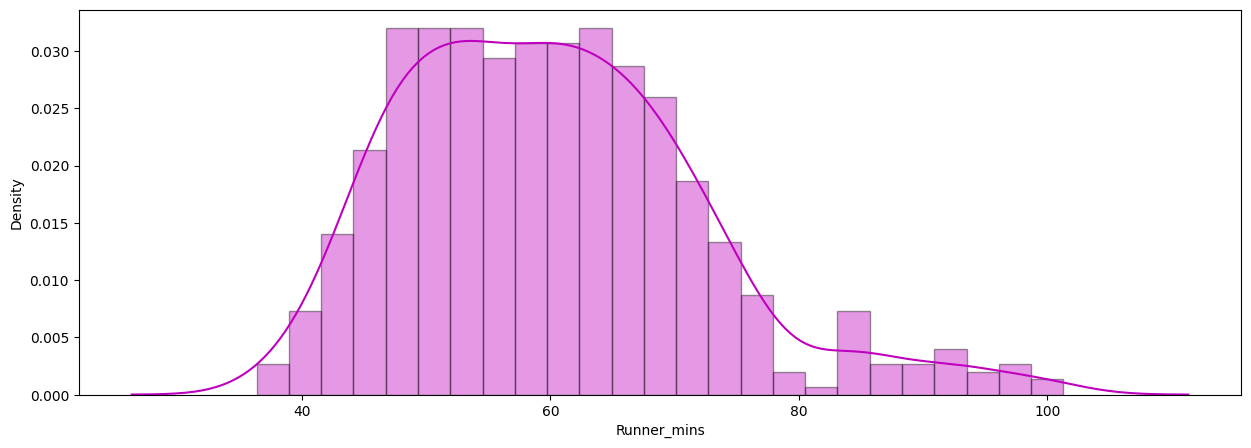

        Runner_mins                                                         \
              count       mean        std        min        25%        50%   
 Gender                                                                      
F             163.0  66.119223  12.184440  43.766667  58.758333  64.616667   
M             414.0  57.640821  11.011857  36.350000  49.395833  55.791667   

                                
               75%         max  
 Gender                         
F        72.058333  101.300000  
M        64.804167   98.516667  


/var/folders/x8/q4jg3ggj7hv0hc7w835pdmsm0000gn/T/ipykernel_10896/3249399368.py:169: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(f_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Female')
/var/folders/x8/q4jg3ggj7hv0hc7w835pdmsm0000gn/T/ipykernel_10896/3249399368.py:170: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.

NameError: name 'Text' is not defined

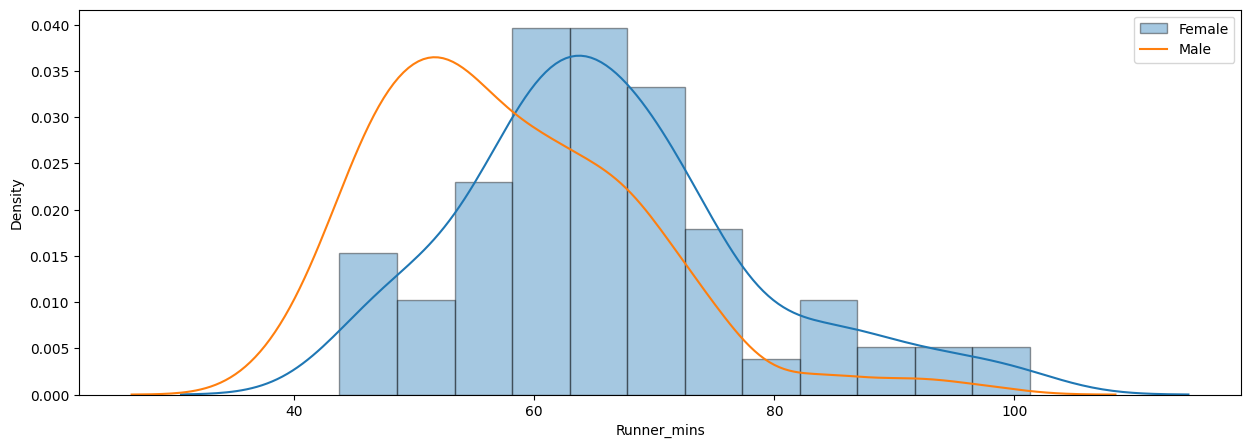

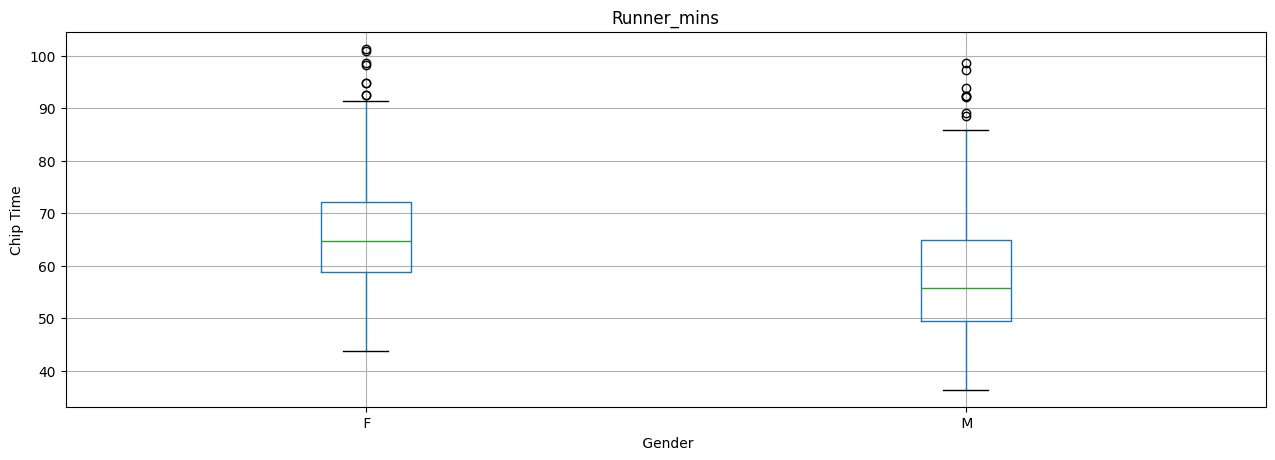

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from urllib.request import urlopen
from bs4 import BeautifulSoup
import bs4

#suggested code that is not working:
#url = "http://www.hubertiming.com/results/2017GPTR10K"
#html = urlopen(url)

#this code works:
import ssl
import certifi
import urllib.request
context = ssl.create_default_context(cafile=certifi.where())
url = "http://www.hubertiming.com/results/2017GPTR10K"
html = urllib.request.urlopen(url, context=context)

soup = BeautifulSoup(html, 'lxml')
type(soup)

#output:
bs4.BeautifulSoup 

# Get the title
title = soup.title
print(title)

soup.find_all('a')

all_links = soup.find_all("a")
for link in all_links:
    print(link.get("href"))


# Print the first 10 rows for sanity check
rows = soup.find_all('tr')
print(rows[:10])

for row in rows:
    row_td = row.find_all('td')
print(row_td)
type(row_td)

bs4.element.ResultSet 

str_cells = str(row_td)
cleantext = BeautifulSoup(str_cells, "lxml").get_text()
print(cleantext)

import re

list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '',str_cells))
    list_rows.append(clean2)
print(clean2)
type(clean2)


df = pd.DataFrame(list_rows)
df.head(10)

df1 = df[0].str.split(',', expand=True)
df1.head(10)

df1[0] = df1[0].str.strip('[')
df1.head(10)

col_labels = soup.find_all('th')

all_header = []
col_str = str(col_labels)
cleantext2 = BeautifulSoup(col_str, "lxml").get_text()
all_header.append(cleantext2)
print(all_header)

df2 = pd.DataFrame(all_header)

df2.head()

df3 = df2[0].str.split(',', expand=True)
df3.head()

frames = [df3, df1]

df4 = pd.concat(frames)
df4.head(10)

df5 = df4.rename(columns=df4.iloc[0])
df5.head()

df5.info()
df5.shape

df6 = df5.dropna(axis=0, how='any')
df6.info()
df6.shape

df7 = df6.drop(df6.index[0])
df7.head()

df7.rename(columns={'[Place': 'Place'},inplace=True)
df7.rename(columns={' Team]': 'Team'},inplace=True)
df7.head()

df7['Team'] = df7['Team'].str.strip(']')
df7.head()

time_list = df7[' Time'].tolist()
time_mins = []

#suggested code giving error
#for i in time_list:
 #   h, m, s = i.split(':')
  #  math = (int(h) * 3600 + int(m) * 60 + int(s))/60
   # time_mins.append(math)
#print(time_mins)

#revised code
for i in time_list:
    i = i.strip()  # Remove leading/trailing spaces
    parts = i.split(':')
    
    if len(parts) == 3:
        h, m, s = parts
    elif len(parts) == 2:
        h = 0
        m, s = parts
    else:
        print(f"Invalid time format: {i}")
        continue

    try:
        math = (int(h) * 3600 + int(m) * 60 + int(s)) / 60
        time_mins.append(math)
    except ValueError as e:
        print(f"Value error in time: {i} – {e}")
        continue
    
df7['Runner_mins'] = time_mins
df7.head()

df7.describe(include=[np.number])

from pylab import rcParams
rcParams['figure.figsize'] = 15, 5


#graph 1 box plot
#df7.boxplot(column='Runner_mins')
#plt.grid(True, axis='y')
#plt.ylabel('Chip Time')
#plt.xticks([1], ['Runners'])

#graph 2 normal distribution graph
x = df7['Runner_mins']
ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})
plt.show()

f_fuko = df7.loc[df7[' Gender']==' F']['Runner_mins']
m_fuko = df7.loc[df7[' Gender']==' M']['Runner_mins']
sns.distplot(f_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Female')
sns.distplot(m_fuko, hist=False, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Male')
plt.legend()

g_stats = df7.groupby(" Gender", as_index=True).describe()
print(g_stats)

df7.boxplot(column='Runner_mins', by=' Gender')
plt.ylabel('Chip Time')
plt.suptitle("")

Text(0.5,0.98,'')
















